# Simulate single cell lineage tracing data using scPhyloX

## 1. Simulation of tissue overshoot model

Import necessary packages

In [1]:
import scPhyloX as spx
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

plt.rcParams['font.size'] = 12
plt.rcParams['pdf.fonttype'] = 42

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Specifies the phylodynamics parameters, derive analytical solution of developmental dynamics.

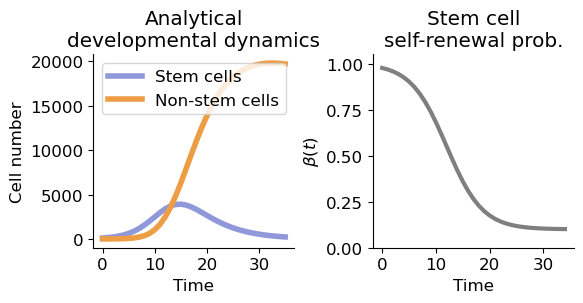

In [2]:
d, p, r, a, b, k, t0 = (0.01, 0.6, 0.4, 0.9, 0.1, 0.3, 12)
T = 35
t = range(T)
x0 = [100, 0]

sol = solve_ivp(spx.sim_tissue.cellnumber, t_span=(0, T), y0=x0, t_eval=range(T+1), method='RK45', args=(a, b, k, t0, p, r, d))
fig, ax = plt.subplots(1, 2, figsize=(6,3.2))
ax[0].plot(sol.t, sol.y[0], label='Stem cells', c='#9098d9', lw=4)
ax[0].plot(sol.t, sol.y[1], label='Non-stem cells', c='#ed9e44', lw=4)
ax[0].legend(loc=2)
ax[1].plot(spx.sim_tissue.bt(np.array(t), a, b, k, t0), lw=3, c='tab:gray')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('Cell number')
ax[1].set_ylabel(r'$\beta(t)$')
ax[1].set_ylim([0,1.05])
# ax[0].ticklabel_format(style='sci', scilimits= (-1,2), axis='y', useMathText=True)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title('Analytical\ndevelopmental dynamics')
ax[1].set_title('Stem cell\nself-renewal prob.')
plt.tight_layout()

Specify DNA mutation rates and perform simulation

In [3]:
mu = 2
system = spx.sim_tissue.simulation(x0, T, mu, a, b, p, r, k, d, t0)

cell_num:19757, time:35.005820193912434

Comparison between simulated and analytical developmental dynamics

Text(0, 0.5, 'Cell number')

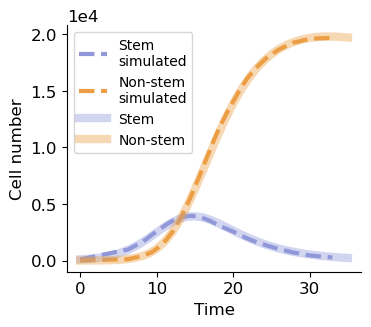

In [4]:
cell_number = np.array(system.n)
fig, ax = plt.subplots(figsize=(3.8, 3.2))
show_tp = np.arange(0, len(system.t),1000)
ax.plot(np.array(system.t)[show_tp], cell_number[show_tp, 0], '--', lw=3, label='Stem\nsimulated', c='#9098d9')
ax.plot(np.array(system.t)[show_tp], cell_number[show_tp, 1], '--', lw=3, label='Non-stem\nsimulated', c='#ed9e44')
ax.plot(sol.t, sol.y[0], label='Stem', c='#9098d9', lw=6, alpha=0.4)
ax.plot(sol.t, sol.y[1], label='Non-stem', c='#ed9e44', lw=6, alpha=0.4)
ax.legend(loc=2,fontsize=10)
ax.ticklabel_format (style='sci', scilimits= (-1,2), axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time')
ax.set_ylabel('Cell number')

Derive mutational character matrix from simulated data

In [5]:
seqtab = np.array([i.seq for i in system.Stemcells] + [i.seq for i in system.Diffcells])
seqtab = seqtab[np.random.choice(range(seqtab.shape[0]), 500, replace=False)]